# **LAB 3 - PART 2 Regression**

In [373]:
!pip install yfinance pandas_datareader

In [374]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import yfinance as yf
import pandas_datareader as web
from sklearn.preprocessing import StandardScaler
import seaborn as sns

### **Retrieve the Financial Data**
Historical stock prices for a set of stocks, foreign exchange rates, and key market indices.

Ticker:
- stock tickers : `stk_tickers = ['MSFT', 'IBM', 'GOOGL']`
- foreign exchange tickers : `ccy_tickers = ['DEXJPUS', 'DEXUSUK']`
- market index tickers : `idx_tickers = ['SP500', 'DJIA', 'VIXCLS']`

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `yf.download()`
- `web.DataReader()`
</details>

In [375]:
### START CODE HERE ###
stk_tickers = ["MSFT", "IBM", "GOOGL"]
ccy_tickers = ["DEXJPUS", "DEXUSUK"]
idx_tickers = ["SP500", "DJIA", "VIXCLS"]

stk_data = yf.download(stk_tickers,start='2018-12-31', end='2023-12-31')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')
### END CODE HERE ###

[*********************100%%**********************]  3 of 3 completed


### **Exploring the Data**

In [376]:
stk_data

Adj Close                               Close              \
                 GOOGL         IBM        MSFT       GOOGL         IBM   
Date                                                                     
2018-12-31   52.248001   85.148727   96.450600   52.248001  108.671127   
2019-01-02   52.734001   86.302299   96.023262   52.734001  110.143402   
2019-01-03   51.273499   84.579414   92.490761   51.273499  107.944550   
2019-01-04   53.903500   87.882896   96.792458   53.903500  112.160614   
2019-01-07   53.796001   88.504631   96.915878   53.796001  112.954109   
...                ...         ...         ...         ...         ...   
2023-12-22  141.490005  162.139999  374.579987  141.490005  162.139999   
2023-12-26  141.520004  163.210007  374.660004  141.520004  163.210007   
2023-12-27  140.369995  163.460007  374.070007  140.369995  163.460007   
2023-12-28  140.229996  163.750000  375.279999  140.229996  163.750000   
2023-12-29  139.690002  163.550003  376.040009  139.690002  163.550003   

                              High                                 Low  \
                  MSFT       GOOGL         IBM        MSFT       GOOGL   
Date                                                                     
2018-12-31  101.570000   53.149502  109.321220  102.400002   51.652000   
2019-01-02  101.120003   53.039501  110.879539  101.750000   51.264000   
2019-01-03   97.400002   53.313000  109.827919  100.190002   51.118500   
2019-01-04  101.930000   54.000000  112.323135  102.510002   51.842999   
2019-01-07  102.059998   54.134998  113.604210  103.269997   53.132000   
...                ...         ...         ...         ...         ...   
2023-12-22  374.579987  141.990005  162.410004  375.179993  140.710007   
2023-12-26  374.660004  142.679993  163.309998  376.940002  141.190002   
2023-12-27  374.070007  142.080002  163.639999  375.059998  139.889999   
2023-12-28  375.279999  141.139999  163.960007  376.459991  139.750000   
2023-12-29  376.040009  140.360001  164.179993  377.160004  138.779999   

                                          Open                          \
                   IBM        MSFT       GOOGL         IBM        MSFT   
Date                                                                     
2018-12-31  107.476097  100.440002   52.891499  108.346077  101.290001   
2019-01-02  106.778206   98.940002   51.360001  107.084129   99.550003   
2019-01-03  107.734222   97.199997   52.533501  109.493309  100.099998   
2019-01-04  109.407265   98.930000   52.127998  109.856598   99.720001   
2019-01-07  111.539200  100.980003   54.048500  112.332695  101.639999   
...                ...         ...         ...         ...         ...   
2023-12-22  161.000000  372.709991  140.770004  161.100006  373.679993   
2023-12-26  162.050003  373.500000  141.589996  162.229996  375.000000   
2023-12-27  162.679993  372.809998  141.589996  163.139999  373.690002   
2023-12-28  163.399994  374.160004  140.779999  163.960007  375.369995   
2023-12-29  162.830002  373.480011  139.630005  163.750000  376.000000   

              Volume                     
               GOOGL      IBM      MSFT  
Date                                     
2018-12-31  33110000  5212009  33173800  
2019-01-02  31868000  4434935  35329300  
2019-01-03  41960000  4546648  42579100  
2019-01-04  46022000  4683779  44060600  
2019-01-07  47446000  3923755  35656100  
...              ...      ...       ...  
2023-12-22  26514600  2439800  17091100  
2023-12-26  16780300  1772400  12673100  
2023-12-27  19628600  3234600  14905400  
2023-12-28  16045700  2071300  14327000  
2023-12-29  18727200  2525600  18723000  

[1259 rows x 18 columns]

In [377]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2019-01-30,109.57,1.3062
2019-01-31,108.84,1.3135
2019-02-01,109.55,1.3094
2019-02-04,109.96,1.3068
2019-02-05,109.99,1.2947
...,...,...
2024-01-15,NaN,NaN
2024-01-16,147.01,1.2657
2024-01-17,148.39,1.2666


In [378]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2019-01-30,2681.05,25014.86,17.66
2019-01-31,2704.10,24999.67,16.57
2019-02-01,2706.53,25063.89,16.14
2019-02-04,2724.87,25239.37,15.73
2019-02-05,2737.70,25411.52,15.57
...,...,...,...
2024-01-22,4850.43,38001.81,13.19
2024-01-23,4864.60,37905.45,12.55
2024-01-24,4868.55,37806.39,13.14


Let's 
- `base` be stk_data's `'Adj Close'` and `'MSFT'`<br>
- `X1` be `stk_data`'s `'Adj Close'` and `('GOOGL','IBM')`<br>
- `X2` be `ccy_data`<br>
- `X3` be `idx_data`


In [379]:
### START CODE HERE ###
base = stk_data["Adj Close"][[ "MSFT" ]]
X1 = stk_data["Adj Close"][["GOOGL", "IBM"]]
X2 = ccy_data
X3 = idx_data
### END CODE HERE ###
base

,MSFT
Date,
2018-12-31,96.450600
2019-01-02,96.023262
2019-01-03,92.490761
2019-01-04,96.792458
2019-01-07,96.915878
...,...
2023-12-22,374.579987
2023-12-26,374.660004
2023-12-27,374.070007


**Standardize `X1-3`**

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.


In [380]:
### START CODE HERE ###
standard_scaler = StandardScaler()
def scaleDf(df):
    return pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns, index=df.index)
X1 = scaleDf(X1).rename(columns={"GOOGL": "(Adj Close, GOOGL)", "IBM": "(Adj Close, IBM)"})
X2 = scaleDf(X2)
X3 = scaleDf(X3) 
### END CODE HERE ###

Create lagged and differenced features for time series analysis<br>
- `Y` : difference price of `'Adj Close', 'MSFT'` for past `n` days.
- `X4_[k]DT` : difference price of `'Adj Close', 'MSFT'` for next `[k]*n` days. Please select 3 values for `k`.
Concatenate the resulting features `X4_[k[0]]DT`, `X4_[k[1]]DT`, `X4_[k[2]]DT` into a single feature set `X4`. Finally, standardize the values in `X4`.<br>
(See detail explanation in lab direction)


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.diff()`
- `.shift()`
</details>

In [381]:
### START CODE HERE ###
N = 3
K = [3,6,12]

Y = base.rename(columns={"MSFT":"(Adj Close, MSFT)"})

### Guide#1 for using price of past [k]*n days
X4_3DT =  base.diff(K[0]*N).shift(-K[0]*N).rename(columns={"MSFT":"MSFT_3DT"})
X4_6DT = base.diff(K[1]*N).shift(-K[1]*N).rename(columns={"MSFT":"MSFT_6DT"})
X4_12DT = base.diff(K[2]*N).shift(-K[2]*N).rename(columns={"MSFT":"MSFT_12DT"})

### Guide#2 for using price of next [k]*n days
# X4_3DT = pd.DataFrame({'MSFT_3DT':base.diff(K[0]*N).shift(-K[0]*N)})
# X4_6DT = pd.DataFrame({'MSFT_6DT':base.diff(K[1]*N).shift(-K[1]*N)})
# X4_12DT = pd.DataFrame({'MSFT_12DT':base.diff(K[2]*N).shift(-K[2]*N)})

X4 = pd.concat([X4_3DT,X4_6DT,X4_12DT],axis=1)
X4
### END CODE HERE ###

,MSFT_3DT,MSFT_6DT,MSFT_12DT
Date,,,
2018-12-31,0.455803,3.333061,9.376244
2019-01-02,3.693916,1.728279,10.394821
2019-01-03,7.577782,8.527382,14.661659
2019-01-04,3.978798,2.373970,10.178749
2019-01-07,5.365242,0.683716,9.921829
...,...,...,...
2023-12-22,NaN,NaN,NaN
2023-12-26,NaN,NaN,NaN
2023-12-27,NaN,NaN,NaN


Concatenate `X1-4` to `X` by index. Then concatenate `X` and `Y` to `dataset` by index.

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.

In [382]:
### START CODE HERE ###
X1.index.name = 'date'
X2.index.name = 'date'
X3.index.name = 'date'
X4.index.name = 'date'

X = pd.concat([X1, X2, X3, X4], axis=1)
# Concatenate X and Y into a DataFrame dataset by index
dataset = pd.concat([X, Y], axis=1)
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

| Date       | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|------------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| 2018-12-31 | -1.545378          | -1.993072         | -0.652377 | -0.107177 | -1.966763| -1.936393| 0.492393 | 0.455826 | 3.333092 | 9.376259  | 96.792442         |
| 2019-01-01 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2019-01-02 | -1.529007          | -1.918422         | -0.684528 | -0.3554   | -1.961748| -1.931557| 0.224562 | 3.693924 | 1.728264 | 10.394836 | 96.915886         |
| 2019-01-03 | -1.578206          | -2.029912         | -0.761557 | -0.302747 | -2.05974 | -2.10151 | 0.496045 | 7.577789 | 8.52739  | 14.661652 | 97.618576         |
| 2019-01-04 | -1.48961           | -1.816142         | -0.746821 | -0.141777 | -1.927197| -1.909175| 0.000558 | 3.978821 | 2.373985 | 10.178764 | 99.014511         |
| ...        | ...                | ...               | ...       | ...       | ...      | ...      | ...      | ...      | ...      | ...       | ...               |
| 2023-12-22 | 1.46086            | 2.989076          | 1.551328  | -0.171865 | 1.577892 | 1.683629 | -1.015981| NaN      | NaN      | NaN       | 375.279999        |
| 2023-12-25 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2023-12-26 | 1.46187            | 3.058317          | NaN       | NaN       | 1.60962  | 1.724664 | -1.020851| NaN      | NaN      | NaN       | NaN               |
| 2023-12-27 | 1.42313            | 3.074495          | NaN       | NaN       | 1.620391 | 1.753295 | -1.089026| NaN      | NaN      | NaN       | NaN               |
| 2023-12-28 | 1.418414           | 3.09326           | NaN       | NaN       | 1.623182 | 1.767092 | NaN      | NaN      | NaN      | NaN       | NaN               |

</details>

In [383]:
dataset

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,"(Adj Close, MSFT)"
2018-12-31,-1.545902,-1.988830,NaN,NaN,NaN,NaN,NaN,0.455803,3.333061,9.376244,96.450600
2019-01-02,-1.529536,-1.914432,NaN,NaN,NaN,NaN,NaN,3.693916,1.728279,10.394821,96.023262
2019-01-03,-1.578717,-2.025547,NaN,NaN,NaN,NaN,NaN,7.577782,8.527382,14.661659,92.490761
2019-01-04,-1.490155,-1.812493,NaN,NaN,NaN,NaN,NaN,3.978798,2.373970,10.178749,96.792458
2019-01-07,-1.493775,-1.772395,NaN,NaN,NaN,NaN,NaN,5.365242,0.683716,9.921829,96.915878
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-22,NaN,NaN,NaN,NaN,1.688079,1.791981,-0.976613,NaN,NaN,NaN,NaN
2024-01-23,NaN,NaN,NaN,NaN,1.710596,1.767109,-1.053995,NaN,NaN,NaN,NaN
2024-01-24,NaN,NaN,NaN,NaN,1.716872,1.741540,-0.982658,NaN,NaN,NaN,NaN
2024-01-25,NaN,NaN,NaN,NaN,1.757568,1.804194,-0.945177,NaN,NaN,NaN,NaN


**Drop NA**

Drop NA from `dataset`.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
DatetimeIndex: 1207 entries, 2018-12-31 to 2023-11-06
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1207 non-null   float64
 1   (Adj Close, IBM)    1207 non-null   float64
 2   DEXJPUS             1207 non-null   float64
 3   DEXUSUK             1207 non-null   float64
 4   SP500               1207 non-null   float64
 5   DJIA                1207 non-null   float64
 6   VIXCLS              1207 non-null   float64
 7   MSFT_3DT            1207 non-null   float64
 8   MSFT_6DT            1207 non-null   float64
 9   MSFT_12DT           1207 non-null   float64
 10  (Adj Close, MSFT)   1207 non-null   float64
dtypes: float64(11)
memory usage: 113.2 KB
```
<br>

| Statistic | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|-----------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| count     | 1207.000000        | 1207.000000       | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 |
| mean      | -0.035934          | -0.076293         | -0.048627 | 0.010266  | -0.038274| -0.038135| 0.032071 | 2.003695 | 4.026331 | 8.035808  | 228.156289        |
| std       | 0.990693           | 0.898243          | 0.967200  | 1.011495 | 0.987860 | 0.988187 | 1.006162 | 11.217826 | 15.534667 | 20.737484 | 70.323041         |
| min       | -1.578206          | -2.638620         | -1.133307 | -3.206211 | -2.391674 | -3.155777 | -1.197376 | -33.900146 | -52.498260 | -60.695969 | 96.792442         |
| 25%       | -0.995937          | -0.771499         | -0.759213 | -0.719462 | -1.006790 | -0.968910 | -0.631888 | -3.104721 | -4.466766 | -1.814156 | 165.381950        |
| 50%       | 0.007967           | -0.093102         | -0.598791 | 0.029723  | 0.217450  | 0.238699  | -0.194228 | 2.514923 | 4.754410 | 9.164612  | 238.217758        |
| 75%       | 0.814595           | 0.512558          | 0.890217  | 0.725501  | 0.808928  | 0.821986  | 0.480219  | 8.710037 | 13.093704 | 20.562767 | 284.131805        |
| max       | 1.742090           | 2.083764          | 2.144788  | 2.036573  | 1.644014  | 1.532654  | 7.464517  | 35.238464 | 48.708038 | 72.977844 | 362.464325        |



</details>

In [384]:
### START CODE HERE ###
dataset.dropna(inplace=True)
### END CODE HERE ###
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1189 entries, 2019-01-30 to 2023-11-07
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1189 non-null   float64
 1   (Adj Close, IBM)    1189 non-null   float64
 2   DEXJPUS             1189 non-null   float64
 3   DEXUSUK             1189 non-null   float64
 4   SP500               1189 non-null   float64
 5   DJIA                1189 non-null   float64
 6   VIXCLS              1189 non-null   float64
 7   MSFT_3DT            1189 non-null   float64
 8   MSFT_6DT            1189 non-null   float64
 9   MSFT_12DT           1189 non-null   float64
 10  (Adj Close, MSFT)   1189 non-null   float64
dtypes: float64(11)
memory usage: 111.5 KB


,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,"(Adj Close, MSFT)"
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,-0.012832,-0.053553,-0.069077,0.012268,-0.063032,-0.064621,0.047082,2.026350,4.052368,8.014612,229.673477
std,0.980946,0.883895,0.957646,1.018320,0.976596,0.973809,1.006252,11.305652,15.648647,20.891606,69.007943
min,-1.556374,-2.632217,-1.148804,-3.201039,-2.464198,-3.217927,-1.176113,-33.900177,-52.498260,-60.695999,97.599594
25%,-0.939643,-0.753330,-0.781554,-0.735168,-1.040014,-0.999523,-0.622349,-3.181793,-4.670624,-2.022049,171.068405
50%,0.040863,-0.062767,-0.615401,0.033161,0.179149,0.210471,-0.178613,2.584373,4.929779,9.164604,238.754181
75%,0.819731,0.526559,0.864149,0.741347,0.772904,0.774233,0.502105,8.836929,13.505737,20.741425,284.978210
max,1.740315,2.074342,2.077987,2.038936,1.602476,1.481690,7.426569,35.238464,48.708038,72.977814,359.799744


Let's `Y` be `dataset`'s `Y` column and X be all `dataset`'s columns except `Y`.

In [385]:
### START CODE HERE ###
Y = dataset["(Adj Close, MSFT)"]
X = dataset.drop(columns=["(Adj Close, MSFT)"])

### END CODE HERE ###

**Calculate the Correlation**

Drop columns that have correlation more than 0.9.

DROPPED {'SP500', 'DJIA'}


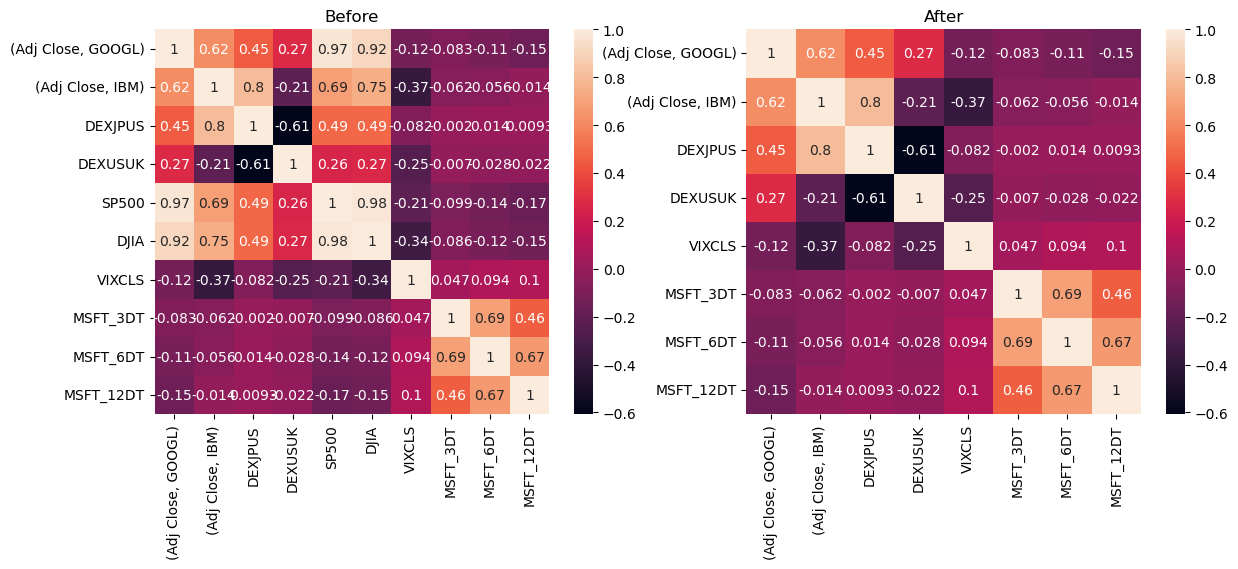

In [386]:
### START CODE HERE ###
fig, axs = plt.subplots(ncols=2, figsize=(14, 5))  # Create a figure with two subplots

correlation_matrix= X.corr()
sns.heatmap(correlation_matrix, annot=True, ax=axs[0])  # Plot heatmap on the first subplot
axs[0].set_title('Before')  # Set title for the first subplot

columns_to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            columns_to_drop.add(colname)
# Dropping the columns from the DataFrame
X = X.drop(columns=columns_to_drop)
sns.heatmap(X.corr(), annot=True, ax=axs[1])  # Plot heatmap on the second subplot
axs[1].set_title('After')  # Set title for the second subplot
print("DROPPED" , columns_to_drop)

In [387]:
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2019-01-30,-1.456616,-0.988301,-0.683972,0.345906,-0.436149,0.484299,6.134277,10.606911
2019-01-31,-1.409642,-0.986369,-0.732104,0.455667,-0.567940,2.260040,7.804779,13.040344
2019-02-01,-1.421882,-1.001828,-0.685291,0.394020,-0.619931,3.912338,9.238113,14.845612
2019-02-04,-1.383494,-0.949170,-0.658258,0.354927,-0.669504,2.355019,6.904137,10.947617
2019-02-05,-1.365900,-0.931777,-0.656280,0.172994,-0.688849,0.902122,5.241241,9.694809
...,...,...,...,...,...,...,...,...
2023-11-01,0.952741,1.791839,2.045021,-1.059941,-0.531668,24.150970,37.330994,29.210968
2023-11-02,0.987762,1.894509,2.013372,-0.987769,-0.677968,22.055542,31.235535,27.045532
2023-11-03,1.041977,1.951265,1.939527,-0.688557,-0.768649,24.084625,26.824615,21.984619
2023-11-06,1.080701,2.019499,1.966560,-0.662996,-0.771068,14.042175,18.702179,19.472168


### **Train/Test Model**

**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 70% of data for training and last 30% for testing.


In [388]:
from sklearn.model_selection import train_test_split
### START CODE HERE ###
test_size = 0.3
train_size = 0.7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, train_size=train_size, random_state=0, shuffle=False)
### START CODE HERE ###

### **Grid Search**
**Initialize models and Search Space**
- `Linear Regression`
- `Support Vector Regression`


Utilize the search space as provided by the Lab direction.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- Your parameters are assigned according to Lab direction.
- `Linear Regression: {'fit_intercept': [True, False]}`
- `SVR: {'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 100], 'gamma': [0.01, 0.1], 'degree': [2, 3]}`

</details>

In [389]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
### START CODE HERE ###

grid_linear_resgression = { "fit_intercept" : [True,False] }
grid_svr = {  'C': [ 0.1,1,100] , 'gamma': [ 0.01, 0.1, 10], 'degree': [2,3 ]}

svr = SVR()
regressor = LinearRegression()
### END CODE HERE ###

Perform the grid search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the grid search space for each model.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `GridSearchCV()`
</details>


In [390]:
### START CODE HERE ###
from sklearn.model_selection import GridSearchCV

grid_cv_linear = GridSearchCV(regressor, grid_linear_resgression, cv=5)
grid_cv_linear.fit(X_train, Y_train)

grid_cv_svr = GridSearchCV(svr, grid_svr, cv=5)
grid_cv_svr.fit(X_train, Y_train)

def show (cv_linear, cv_svr):
    print("Best parameters for Linear Regression: ", cv_linear.best_params_)
    print("Best score for Linear Regression: ", cv_linear.best_score_)
    print("Best parameters for SVM: ", cv_svr.best_params_)
    print("Best score for SVM: ", cv_svr.best_score_)

    linear_regression_mean_score = np.average ( cv_linear.cv_results_['mean_test_score'] )
    svm_mean_score = np.average ( cv_svr.cv_results_['mean_test_score'] )
    linear_regression_std_score = np.std ( cv_linear.cv_results_['std_test_score'] )
    svm_std_score = np.std ( cv_svr.cv_results_['std_test_score'] )
    print("Linear Regression mean score: ", linear_regression_mean_score)
    print("SVM mean score: ", svm_mean_score)
    print("Linear Regression std score: ", linear_regression_std_score)
    print("SVM std score: ", svm_std_score)
show(grid_cv_linear, grid_cv_svr)
### END CODE HERE ###

Best parameters for Linear Regression:  {'fit_intercept': True}
Best score for Linear Regression:  -2.278331365347715
Best parameters for SVM:  {'C': 100, 'degree': 2, 'gamma': 0.01}
Best score for SVM:  -11.245444468019201
Linear Regression mean score:  -29.48118176599011
SVM mean score:  -26.64232148648351
Linear Regression std score:  23.999699857820637
SVM std score:  9.230341264302314


Utilize the best parameters obtained from grid search to create both a Linear Regression model and an SVR model. Compare the predicted values of each model with those in the Y_test DataFrame and plot the graph. Also concatenate the compared dataframe with the Y_train.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
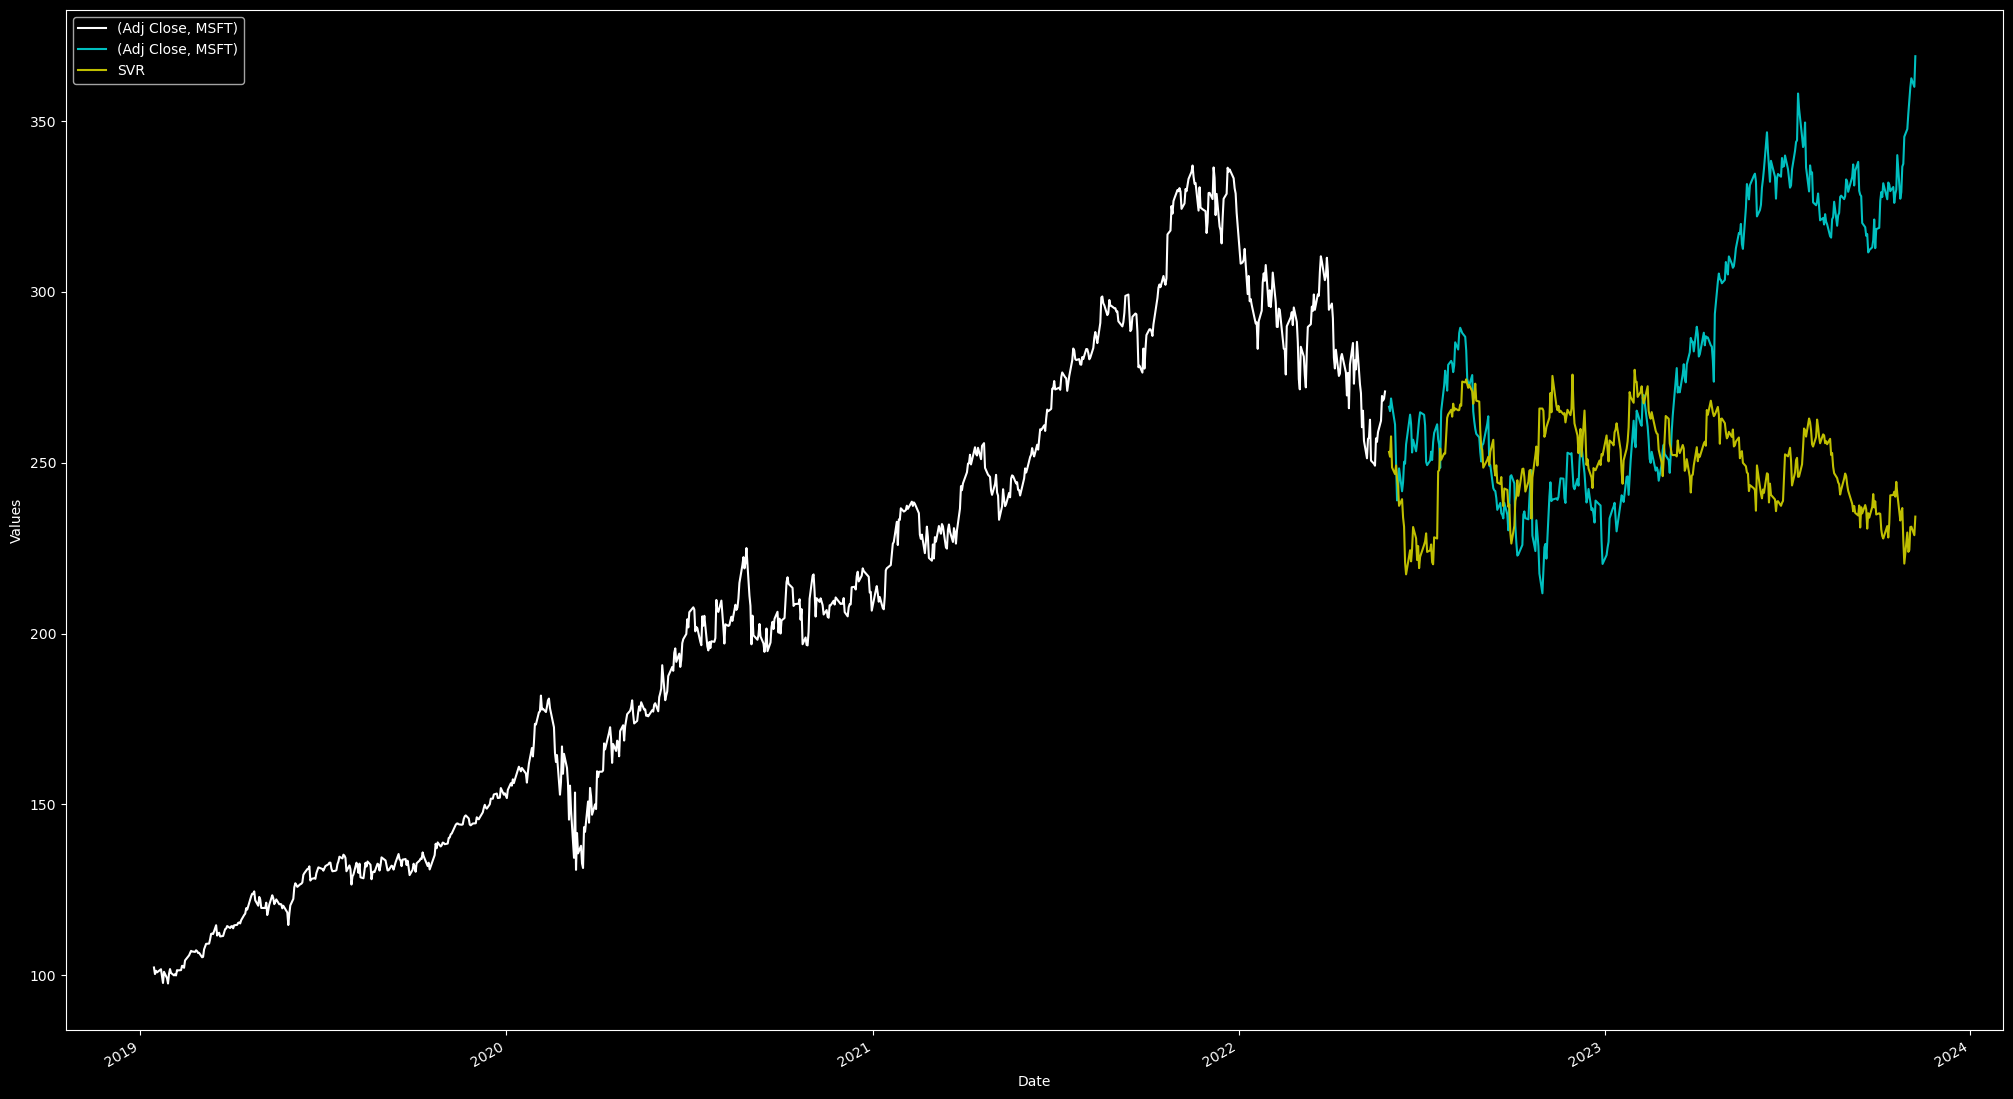

</details>

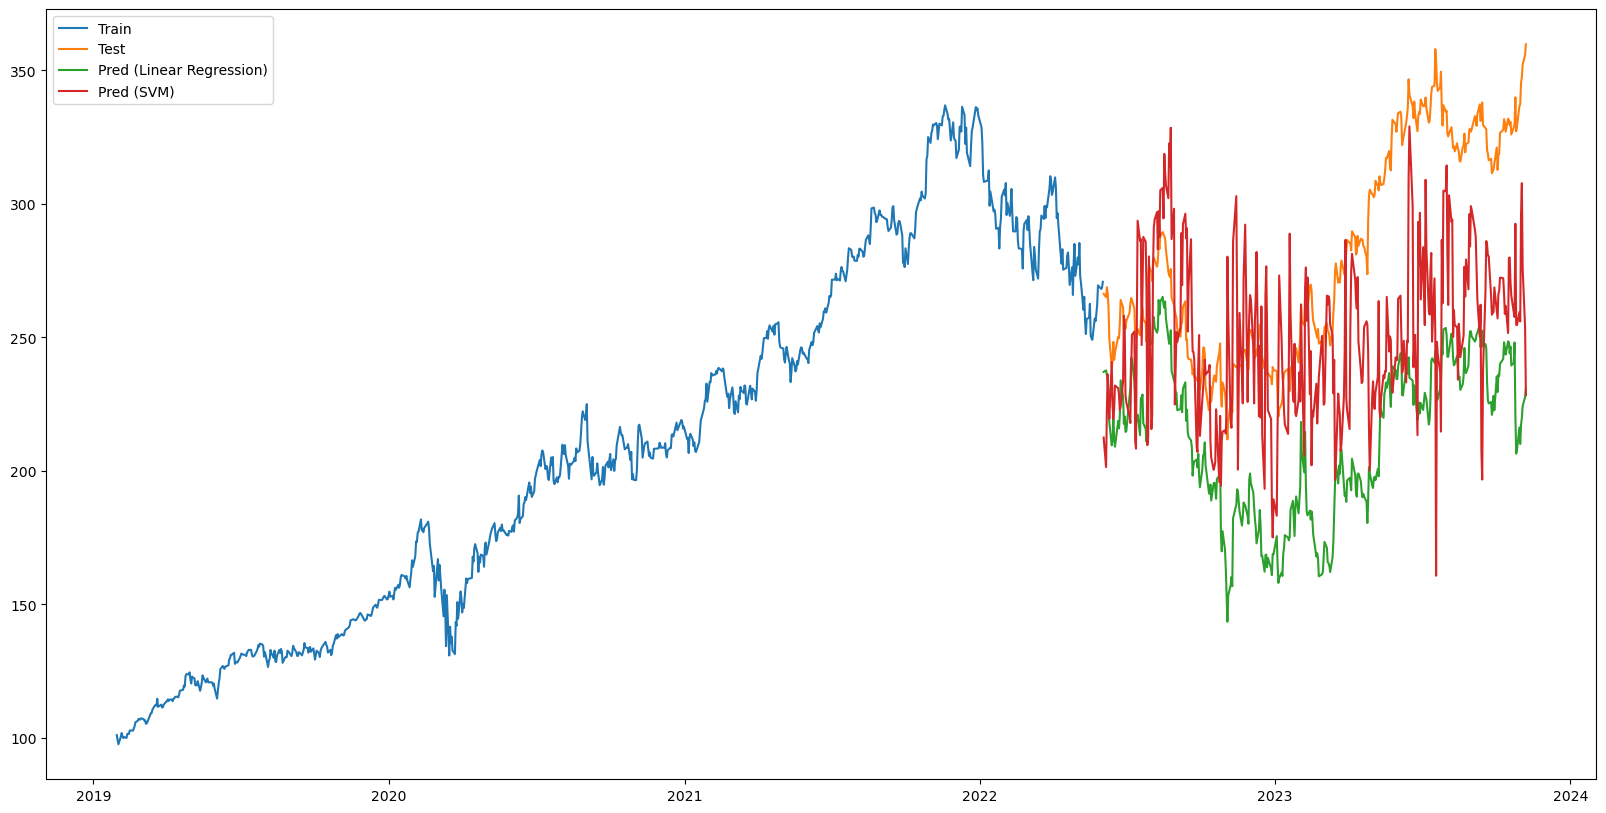

In [391]:
### START CODE HERE ###
#Combine y_train and y_test then plot, make sure test has different color
def plotit(cv_linear, cv_svr):
    y_pred_ln = cv_linear.predict(X_test)
    y_pred_svm = cv_svr.predict(X_test)

    plt.figure(figsize=(20,10))
    plt.plot(Y_train.index, Y_train.values, label='Train')
    plt.plot(Y_test.index, Y_test.values, label='Test')
    plt.plot(Y_test.index, y_pred_ln, label='Pred (Linear Regression)')
    plt.plot(Y_test.index, y_pred_svm, label='Pred (SVM)')
    plt.legend(loc='best')
    plt.show()

plotit(grid_cv_linear, grid_cv_svr)
### END CODE HERE ###

### **Random Search**
**Initialize models and Search Space**
- `Linear Regression`
- `Support Vector Regression`


Utilize the search space as provided by the Lab direction.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- `{'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 100], 'epsilon': [0.1, 1, 5], 'gamma': [0.01, 0.1], 'degree': [2, 3]}`

</details>

In [392]:
### START CODE HERE ###
random_linear_resgression = { "fit_intercept" : [True,False] }
random_svr = { 'C': np.linspace(1,100,5) , 'gamma': np.linspace(0.01,1,5), 'degree': [2,3 ]}
### END CODE HERE ###

Perform the random search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the random search space for each model.

In [393]:
### START CODE HERE ###
from sklearn.model_selection import RandomizedSearchCV
rand_cv_linear = RandomizedSearchCV(regressor, random_linear_resgression, cv=5,n_iter=30)
rand_cv_linear.fit(X_train, Y_train)

rand_cv_svr = RandomizedSearchCV(svr, random_svr, cv=5,n_iter=30)
rand_cv_svr.fit(X_train, Y_train)

show(grid_cv_linear, grid_cv_svr)
### END CODE HERE ###

/home/ss/.conda/envs/ML_Lab/lib/python3.10/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=30. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Linear Regression:  {'fit_intercept': True}
Best score for Linear Regression:  -2.278331365347715
Best parameters for SVM:  {'C': 100, 'degree': 2, 'gamma': 0.01}
Best score for SVM:  -11.245444468019201
Linear Regression mean score:  -29.48118176599011
SVM mean score:  -26.64232148648351
Linear Regression std score:  23.999699857820637
SVM std score:  9.230341264302314


Utilize the best parameters obtained from random grid search to create both a Linear Regression model and an SVR model. Compare the predicted values of each model with those in the Y_test DataFrame and plot the graph. Also concatenate the comared dataframe with the Y_train.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
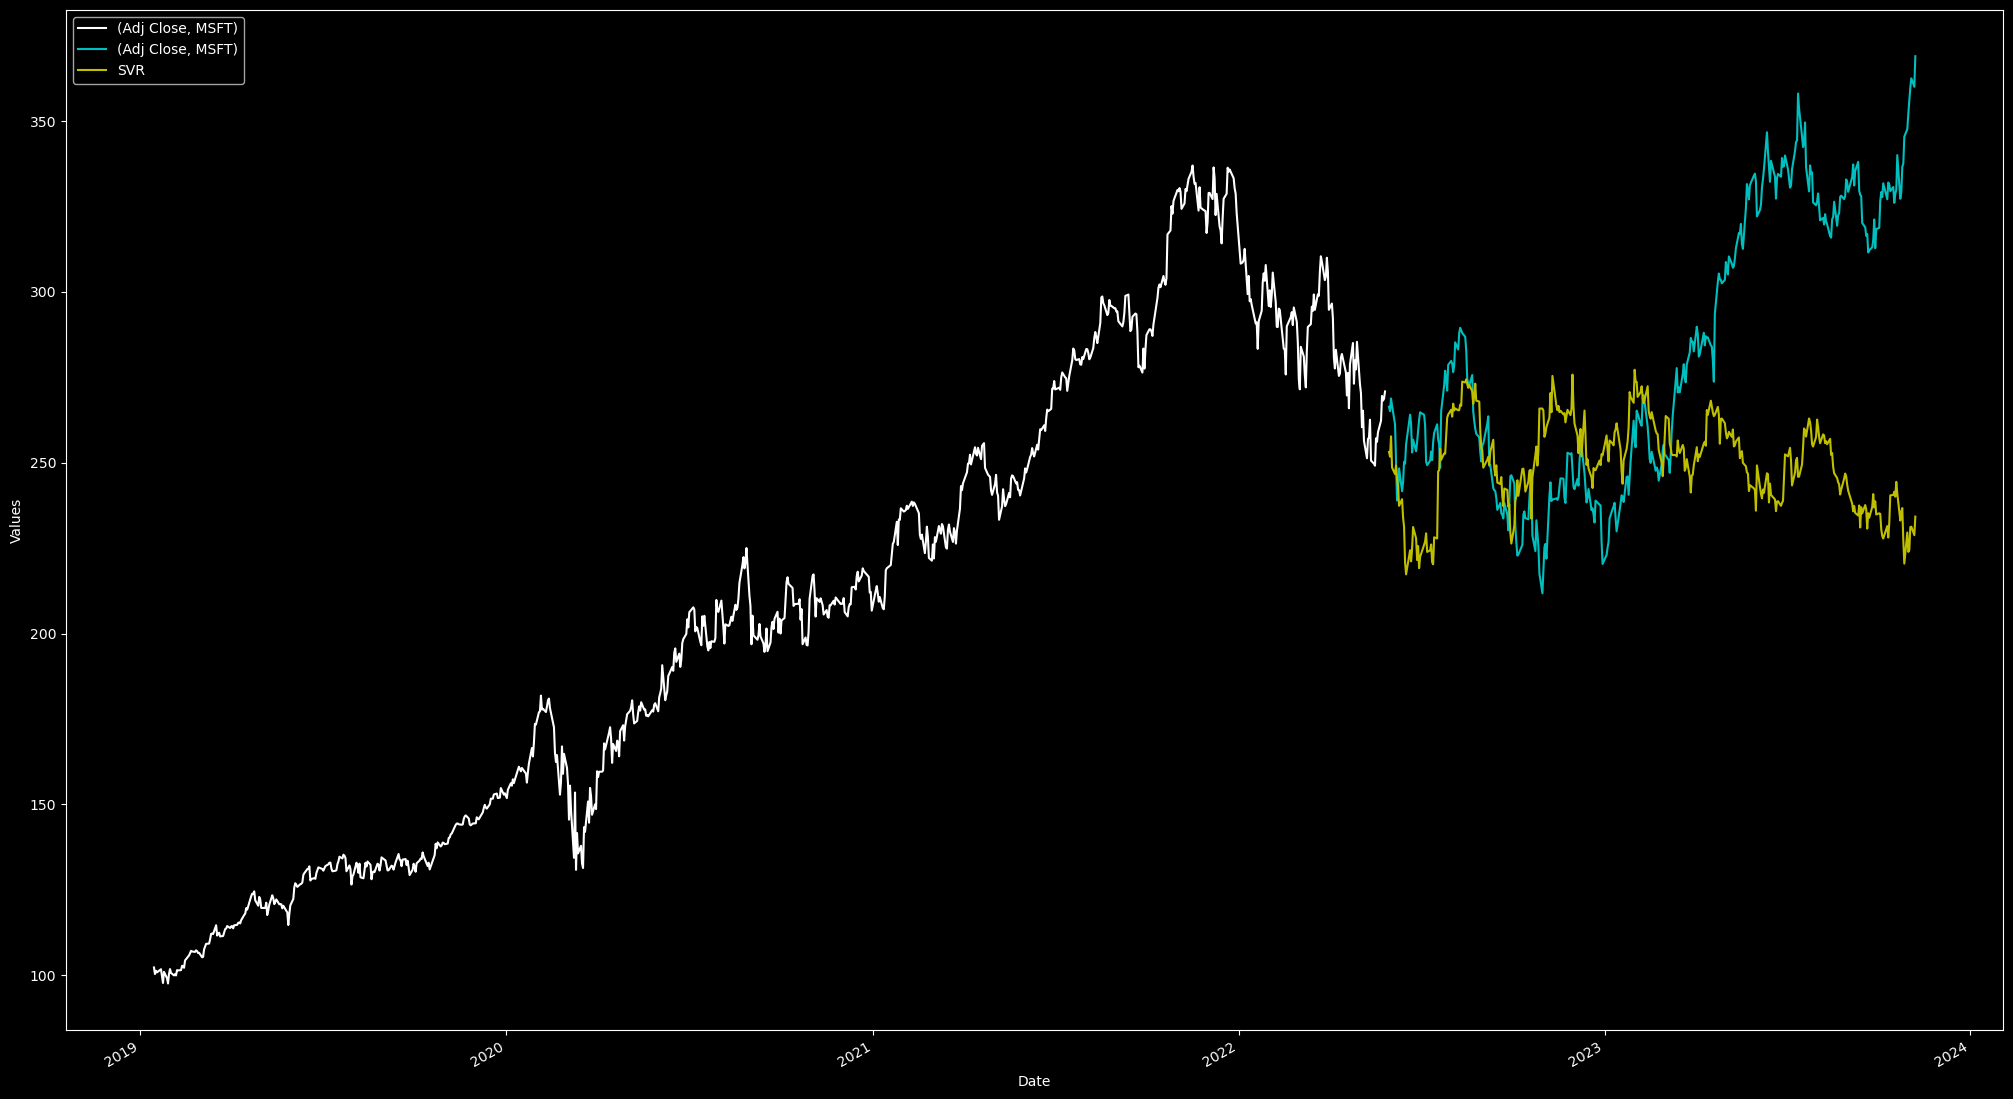

</details>

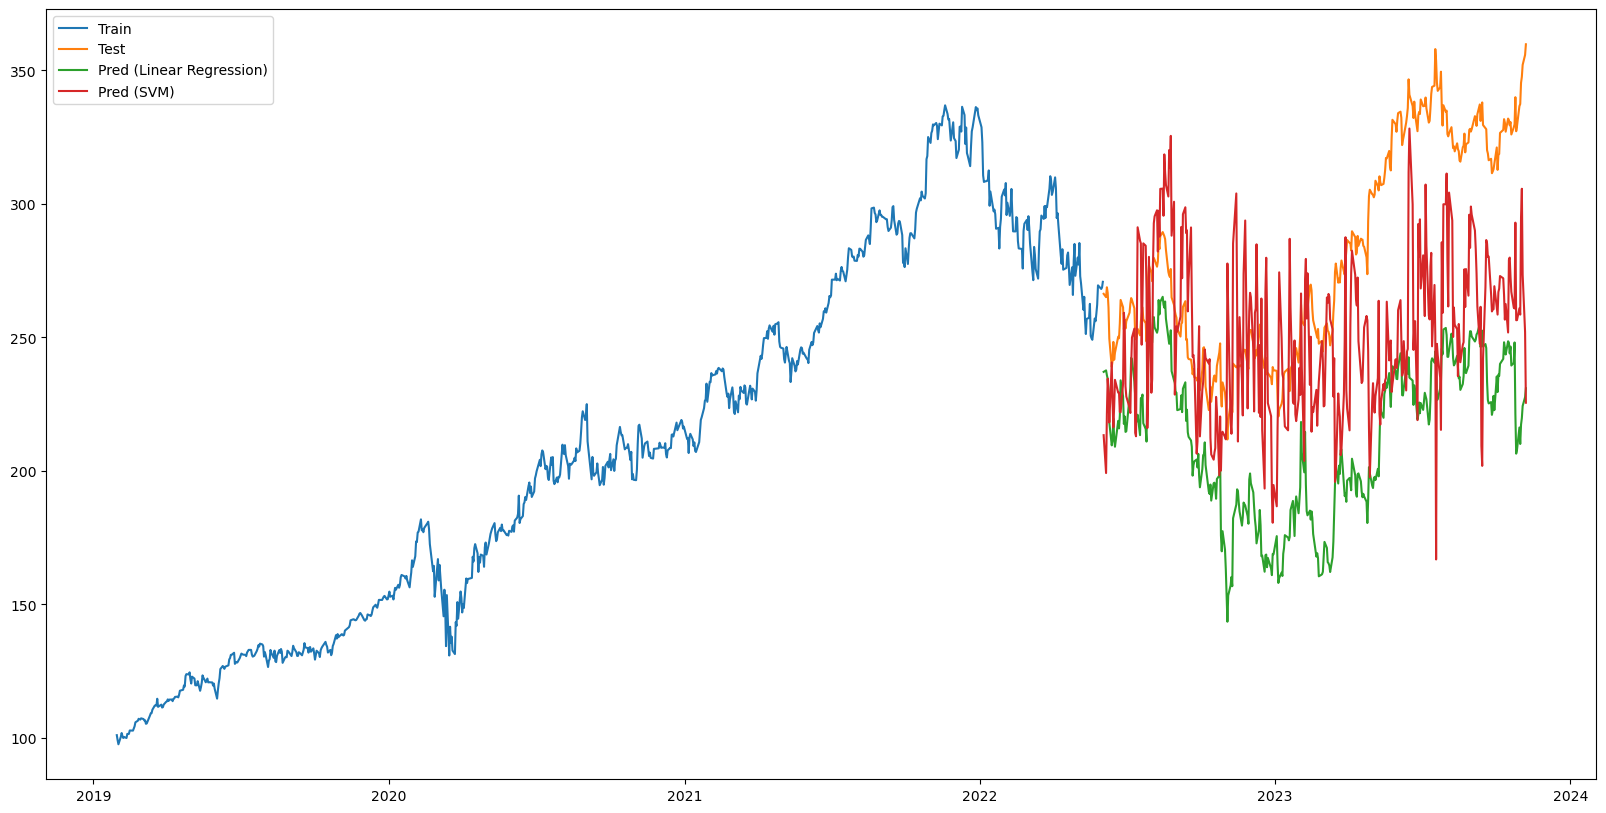

In [394]:
### START CODE HERE ###
plotit(rand_cv_linear, rand_cv_svr)
### START CODE HERE ###

### Question
1. Rank Top 3 Best parameters of SVM Models from GridSearchCV.
2. Rank Top 3 Best parameters of SVM Models from RandomizedSearchCV.
3. Are those best parameters from GridSearchCV similar to RandomizedSearchCV? Explain?
4. What is the Mean Squared Error (MSE) for the best parameters obtained through both GridSearchCV and RandomizedSearchCV??

In [401]:
#Top 3 Best parameters for svm
def showTop3 (cv):
    results = list(zip(cv.cv_results_['params'], cv.cv_results_['mean_test_score']))
    results.sort(key=lambda x: x[1],reverse=True)
    for params, score in results[:3]:
        print("Best parameters for SVM: ", params)
        print("Best score for SVM: ", score)
showTop3(rand_cv_svr)

Best parameters for SVM:  {'gamma': 0.01, 'degree': 3, 'C': 75.25}
Best score for SVM:  -12.18130878395516
Best parameters for SVM:  {'gamma': 0.01, 'degree': 2, 'C': 50.5}
Best score for SVM:  -13.63666908748101
Best parameters for SVM:  {'gamma': 0.01, 'degree': 3, 'C': 50.5}
Best score for SVM:  -13.63666908748101


In [402]:
showTop3(grid_cv_svr)

Best parameters for SVM:  {'C': 100, 'degree': 2, 'gamma': 0.01}
Best score for SVM:  -11.245444468019201
Best parameters for SVM:  {'C': 100, 'degree': 3, 'gamma': 0.01}
Best score for SVM:  -11.245444468019201
Best parameters for SVM:  {'C': 100, 'degree': 2, 'gamma': 0.1}
Best score for SVM:  -19.49515649059179


## Not similar , Grid is better because it searchs every corners